In [1]:
# Importando as bibliotecas utilizadas
import yfinance as yf # utilizada para obter dados de ações do yahoo finance
import numpy as np # utilizada para trabalharmos com séries de dados
import pandas as pd # utilizada para trabalharmos com dataframes
import seaborn as sns # utilizada para visualização de dados
import matplotlib.pyplot as plt # utilizada visualização de dados
import matplotlib.ticker as mtick # utilizado para conversão de valores nos eixos de gráficos

In [2]:
# Lendo arquivo com carteira teórica do ibovespa
ibovespa = pd.read_csv('IBOVDia_21-10-22.csv', encoding = 'ISO-8859-1',skiprows=1,sep=';',index_col=False,decimal=',',thousands='.')
ibovespa.set_index('Código',inplace=True)
ibovespa.head()

,Ação,Tipo,Qtde. Teórica,Part. (%)
Código,,,,
RRRP3,3R PETROLEUM,ON NM,2.004539e+08,0.405
ALPA4,ALPARGATAS,PN N1,2.027660e+08,0.192
ABEV3,AMBEV S/A,ON,4.386653e+09,2.987
AMER3,AMERICANAS,ON NM,5.960863e+08,0.382
ARZZ3,AREZZO CO,ON NM,6.035803e+07,0.272


In [3]:
# Checando formato dos dados
ibovespa.dtypes

Ação              object
Tipo              object
Qtde. Teórica    float64
Part. (%)        float64
dtype: object

In [4]:
# Retirando linhas finais que não representam ocorrências
ibovespa.drop(['Quantidade Teórica Total','Redutor'],inplace=True)

In [5]:
# Selecionando códigos da carteira teórica
codigos = list(ibovespa.index.values)
# Convertendo em tickers para consulta em yfinance
tickers = [str(x)+'.SA' for x in codigos]
# Adicionando índice de mercado
tickers.append('^BVSP')
display(tickers)

['RRRP3.SA',
 'ALPA4.SA',
 'ABEV3.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BPAN4.SA',
 'BBSE3.SA',
 'BRML3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BRAP4.SA',
 'BBAS3.SA',
 'BRKM5.SA',
 'BRFS3.SA',
 'BPAC11.SA',
 'CRFB3.SA',
 'CCRO3.SA',
 'CMIG4.SA',
 'CIEL3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CPFE3.SA',
 'CMIN3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENGI11.SA',
 'ENEV3.SA',
 'EGIE3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'NTCO3.SA',
 'SOMA3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'RENT3.SA',
 'LWSA3.SA',
 'LREN3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'CASH3.SA',
 'BEEF3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PRIO3.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RAIL3.SA',
 'SBSP3.SA',
 'SANB11.SA',
 'SMTO3

In [6]:
# Fazendo download do histórico de preço da lista de tickers
precos = yf.download(tickers,'2021-10-18')['Adj Close']
precos.head()

[*********************100%***********************]  93 of 93 completed


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-18,15.033301,46.798866,38.300697,86.071877,16.823448,34.360001,12.323631,29.967371,16.169094,19.000122,...,35.506546,14.775815,15.065535,73.168800,24.005548,8.18,43.392757,39.673885,26.807281,114428.0
2021-10-19,14.571331,45.068138,38.261482,81.505234,16.416748,30.799999,11.942095,28.497375,15.635375,18.412127,...,34.108105,13.999654,14.606448,72.326523,22.559200,7.80,42.888298,38.681053,24.981092,110673.0
2021-10-20,14.831189,45.285717,38.996716,80.801170,16.595299,30.680000,12.533477,29.027691,16.212841,19.043995,...,33.185730,14.191298,14.063040,70.193344,22.578615,7.52,42.972378,39.437962,24.752819,110786.0
2021-10-21,14.571331,43.920914,34.722565,77.975128,16.297716,29.690001,12.409475,27.743774,15.749117,18.649075,...,32.293110,13.376808,13.266665,68.810905,21.384645,6.92,42.299767,38.681053,23.819874,107735.0
2021-10-22,14.436589,43.169281,33.056042,76.361649,15.980292,29.190001,12.037478,26.897131,15.232897,17.946995,...,31.618681,12.936025,13.444678,69.653191,20.879877,6.97,41.627159,38.228870,22.480005,106296.0


In [7]:
# Transformando histórico de preços em histórico de retornos diários
retornos = precos.pct_change()
retornos.head()

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-19,-0.030730,-0.036982,-0.001024,-0.053056,-0.024175,-0.103609,-0.030960,-0.049053,-0.033009,-0.030947,...,-0.039385,-0.052529,-0.030473,-0.011511,-0.060251,-0.046455,-0.011625,-0.025025,-0.068123,-0.032815
2021-10-20,0.017834,0.004828,0.019216,-0.008638,0.010876,-0.003896,0.049521,0.018609,0.036933,0.034318,...,-0.027043,0.013689,-0.037203,-0.029494,0.000861,-0.035897,0.001960,0.019568,-0.009138,0.001021
2021-10-21,-0.017521,-0.030138,-0.109603,-0.034975,-0.017932,-0.032269,-0.009894,-0.044231,-0.028602,-0.020737,...,-0.026898,-0.057394,-0.056629,-0.019695,-0.052881,-0.079787,-0.015652,-0.019192,-0.037690,-0.027540
2021-10-22,-0.009247,-0.017113,-0.047995,-0.020692,-0.019477,-0.016841,-0.029977,-0.030517,-0.032778,-0.037647,...,-0.020885,-0.032951,0.013418,0.012241,-0.023604,0.007225,-0.015901,-0.011690,-0.056250,-0.013357


In [8]:
# Removendo o primeiro dia de histórico, que terá retorno nulo
retornos = retornos.drop(retornos.index[0])
retornos.head()

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-19,-0.030730,-0.036982,-0.001024,-0.053056,-0.024175,-0.103609,-0.030960,-0.049053,-0.033009,-0.030947,...,-0.039385,-0.052529,-0.030473,-0.011511,-0.060251,-0.046455,-0.011625,-0.025025,-0.068123,-0.032815
2021-10-20,0.017834,0.004828,0.019216,-0.008638,0.010876,-0.003896,0.049521,0.018609,0.036933,0.034318,...,-0.027043,0.013689,-0.037203,-0.029494,0.000861,-0.035897,0.001960,0.019568,-0.009138,0.001021
2021-10-21,-0.017521,-0.030138,-0.109603,-0.034975,-0.017932,-0.032269,-0.009894,-0.044231,-0.028602,-0.020737,...,-0.026898,-0.057394,-0.056629,-0.019695,-0.052881,-0.079787,-0.015652,-0.019192,-0.037690,-0.027540
2021-10-22,-0.009247,-0.017113,-0.047995,-0.020692,-0.019477,-0.016841,-0.029977,-0.030517,-0.032778,-0.037647,...,-0.020885,-0.032951,0.013418,0.012241,-0.023604,0.007225,-0.015901,-0.011690,-0.056250,-0.013357
2021-10-25,0.018000,0.040321,0.017497,0.030222,0.001241,0.005824,0.021395,0.020754,0.016083,0.015159,...,0.047051,0.016296,0.022997,0.012092,0.051604,0.017217,0.007181,0.016971,-0.013245,0.022757


In [9]:
# Estatísticas sumárias do histórico de retornos diários de cada ação do ibovespa
retornos.describe()

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,...,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,0.000172,-0.002708,-0.002627,0.000868,0.000696,-0.001881,0.000832,0.001521,0.000254,0.000339,...,-0.000211,-0.000086,-0.002213,0.000271,-0.000900,-0.002896,-0.000260,-0.000302,-0.002316,0.000171
std,0.016308,0.031993,0.048317,0.023154,0.021969,0.043561,0.025061,0.019791,0.017093,0.018178,...,0.026640,0.026247,0.029244,0.024445,0.022858,0.045847,0.013516,0.022589,0.037977,0.013130
min,-0.045201,-0.135389,-0.130408,-0.059138,-0.092199,-0.180027,-0.058566,-0.060877,-0.087970,-0.085827,...,-0.111249,-0.080921,-0.075366,-0.075913,-0.060251,-0.124823,-0.035039,-0.059345,-0.117610,-0.033900
25%,-0.008415,-0.024011,-0.033607,-0.012624,-0.013432,-0.025873,-0.016937,-0.009177,-0.009104,-0.009570,...,-0.015619,-0.017316,-0.020244,-0.015960,-0.016046,-0.033804,-0.008320,-0.015527,-0.026902,-0.007514
50%,-0.000660,-0.003944,-0.002924,-0.000396,0.000320,-0.004456,-0.000990,0.000835,0.001141,0.000255,...,0.000158,-0.002242,-0.003464,-0.000603,-0.002039,-0.008001,-0.000924,-0.001232,-0.006540,0.000322
75%,0.008454,0.015860,0.022284,0.014498,0.013185,0.020398,0.016237,0.012900,0.010360,0.011745,...,0.015930,0.016060,0.016246,0.015363,0.012987,0.023747,0.006884,0.012542,0.021702,0.008036
max,0.097241,0.100579,0.224866,0.068834,0.089431,0.113451,0.080750,0.076324,0.066217,0.069052,...,0.075089,0.080136,0.097175,0.079866,0.076522,0.144654,0.068118,0.080158,0.141002,0.055409


In [10]:
# Separando o índice de mercado das demais ações
indice_mercado = retornos['^BVSP']
retornos = retornos.drop('^BVSP', axis=1)

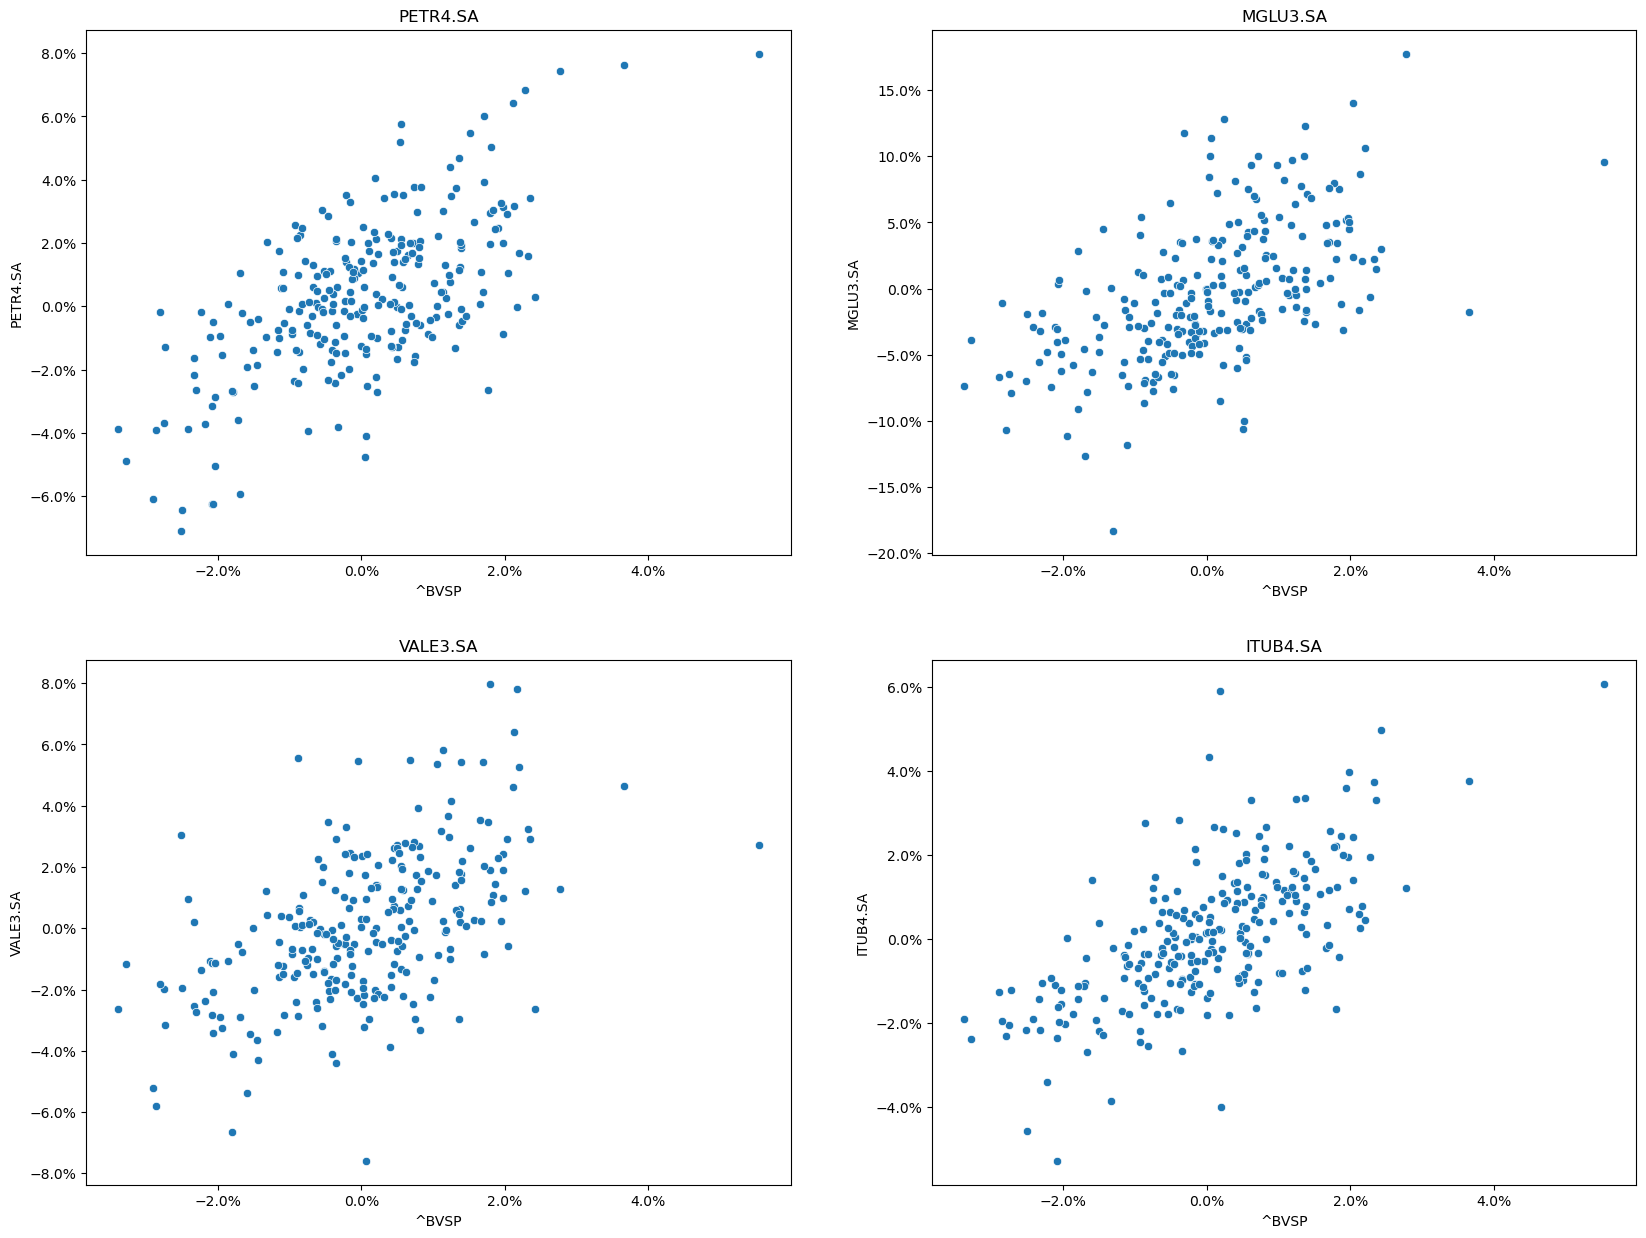

In [11]:
# Criando visualização da distribuição entre retornos das ações e do mercado
fig, axes = plt.subplots(2,2,figsize=(20,15))

for ticker, ax in zip(['PETR4.SA','MGLU3.SA','VALE3.SA','ITUB4.SA'],axes.ravel()):
    sns.scatterplot(ax=ax,x=indice_mercado,y=retornos[ticker])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
    ax.set_title(ticker)

In [12]:
# Definindo função para calcular regressão linear
def regressao(retornos_mercado,retornos_acao):
    x_values = np.array(retornos_mercado)
    y_values = np.array(retornos_acao)

    x_avg = np.mean(x_values)
    y_avg = np.mean(y_values)


    x_diff = x_values - x_avg
    y_diff = y_values - y_avg
    composite = x_diff * y_diff

    x_diff_sqr = x_diff**2
    y_diff_sqr = y_diff**2

    slope = np.sum(composite)/np.sum(x_diff_sqr)
    y_intercept = y_avg - slope*x_avg
    
    y_predictions = slope * x_values + y_intercept
    residuals = y_values - y_predictions
    residuals_squared = residuals**2
    
    r_squared = np.sum(residuals_squared)/np.sum(y_diff_sqr)
    
    return (slope,y_intercept,r_squared)
    

In [13]:
# Inicializando dataframe para receber dados das regressões
regressoes = pd.DataFrame(columns=['Beta','Intercepto','R_Quadrado'])

# Calculando a regressão para as ações da carteira teórica do ibovespa
for ticker in retornos.columns.values:
    resultado = regressao(indice_mercado,retornos[ticker])
    regressoes.loc[ticker] = [resultado[0],resultado[1],resultado[2]]

In [14]:
# Estatísticas sumárias dos componentes das regressões
regressoes.describe()

,Beta,Intercepto,R_Quadrado
count,91.000000,91.000000,91.000000
mean,1.069327,-0.000500,0.722674
std,0.451562,0.001778,0.115835
min,0.256621,-0.006117,0.449552
25%,0.754135,-0.001938,0.636785
50%,1.028041,-0.000037,0.721332
75%,1.334579,0.000642,0.803483
max,2.231902,0.003748,0.964547


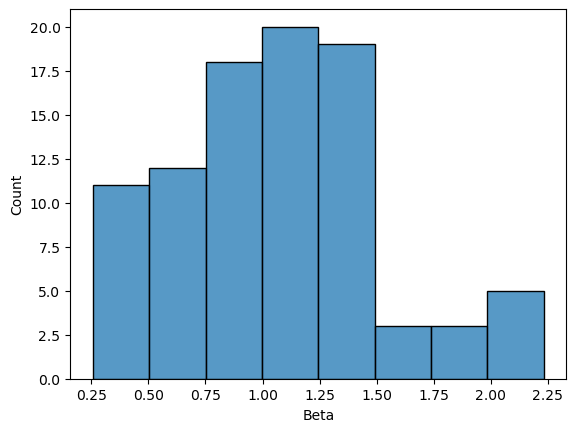

In [15]:
# Visualizando a distribuição dos Betas
plt.clf()
sns.histplot(regressoes['Beta'])
plt.show()

In [16]:
# Visualizando maiores e menores betas
display(regressoes['Beta'].nlargest(5))
display(regressoes['Beta'].nsmallest(5))

MGLU3.SA    2.231902
GOLL4.SA    2.185202
CASH3.SA    2.119897
AZUL4.SA    2.087313
CVCB3.SA    2.036316
Name: Beta, dtype: float64

VIVT3.SA     0.256621
JBSS3.SA     0.268278
TAEE11.SA    0.305549
EGIE3.SA     0.385926
BBSE3.SA     0.405566
Name: Beta, dtype: float64

<Figure size 640x480 with 0 Axes>

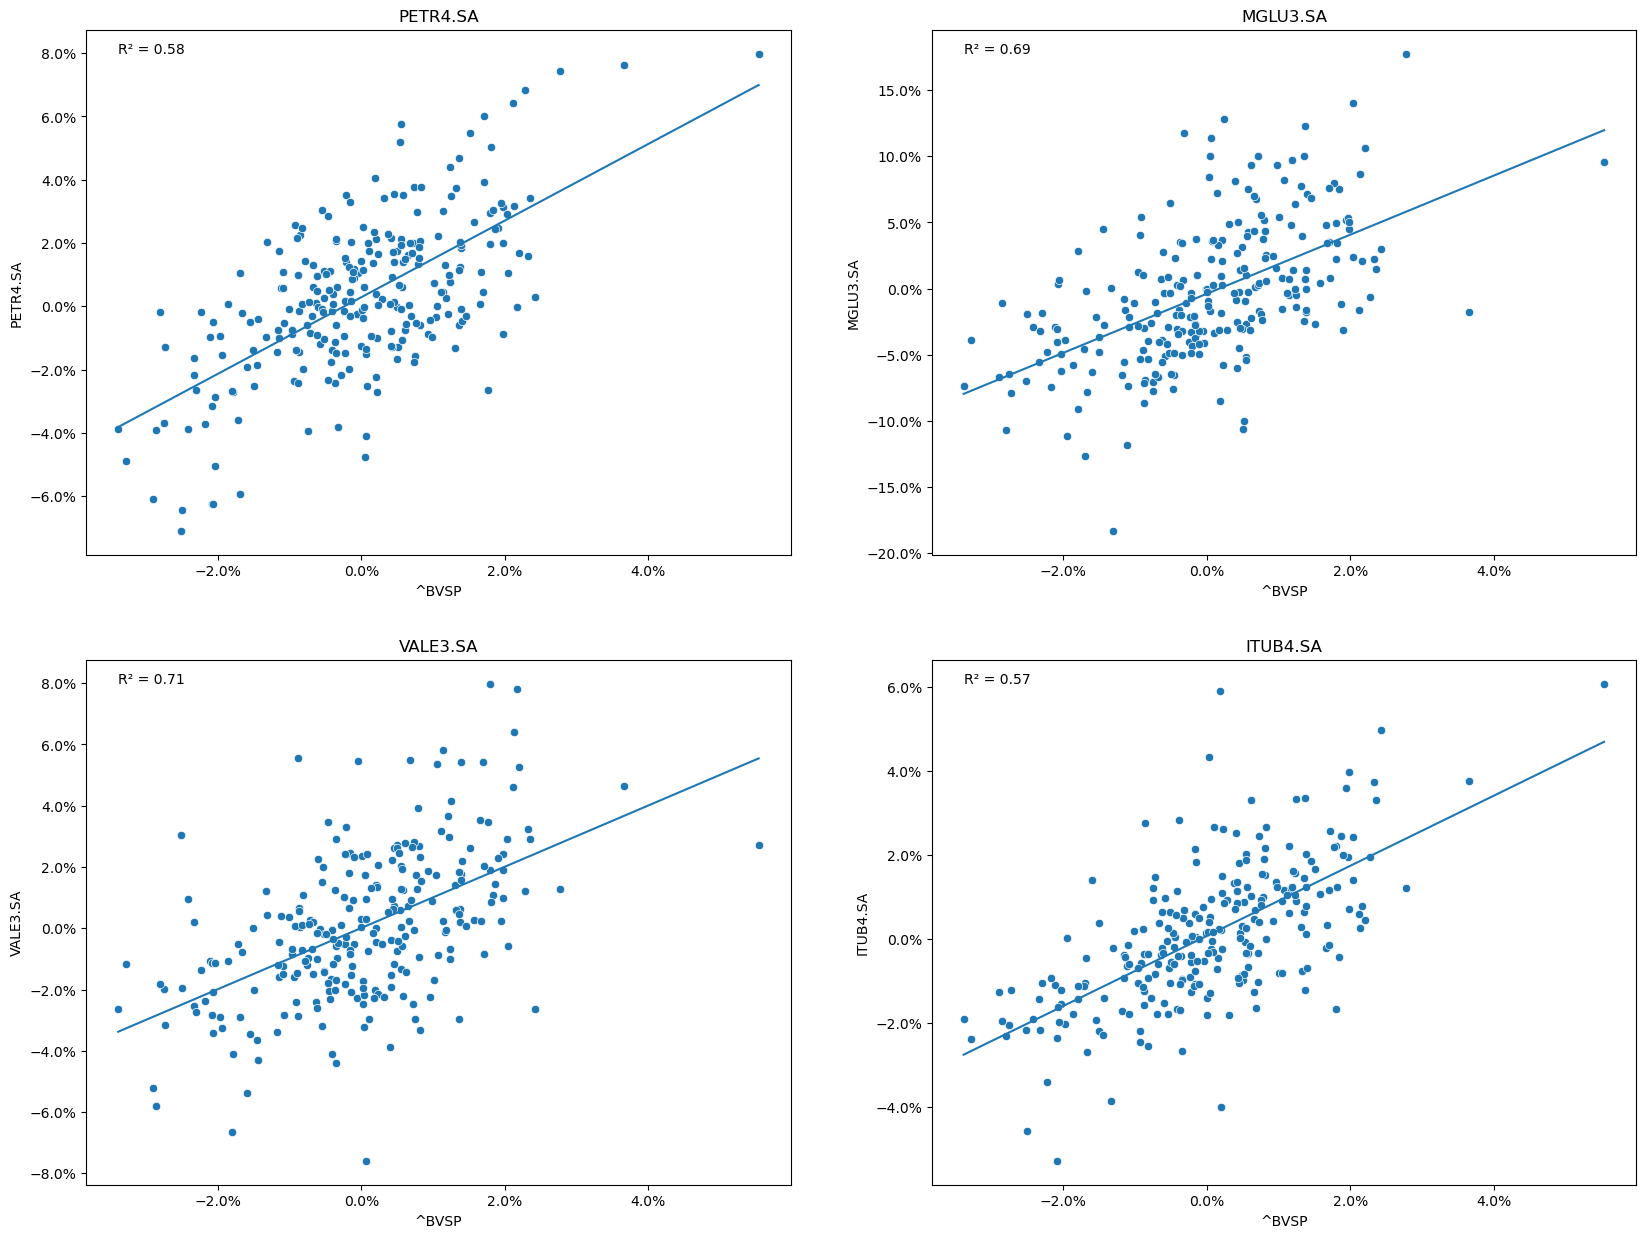

In [17]:
# Criando visualização da distribuição entre retornos das ações e do mercado + regressão 
plt.clf()
fig, axes = plt.subplots(2,2,figsize=(20,15))

for ticker, ax in zip(['PETR4.SA','MGLU3.SA','VALE3.SA','ITUB4.SA'],axes.ravel()):
    sns.scatterplot(ax=ax,x=indice_mercado,y=retornos[ticker])
    regression_equation = regressoes['Beta'].loc[ticker]*indice_mercado + regressoes['Intercepto'].loc[ticker]
    sns.lineplot(ax=ax, x=indice_mercado, y=regression_equation)
    ax.set_title(ticker)
    ax.annotate('R² = '+str(round(regressoes['R_Quadrado'].loc[ticker],2)),(indice_mercado.min(),retornos[ticker].max()))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
                 
plt.show()

In [18]:
# Visualizando maiores e menores R²
display(regressoes['R_Quadrado'].nlargest(5))
display(regressoes['R_Quadrado'].nsmallest(5))

JBSS3.SA    0.964547
MRFG3.SA    0.950757
VIVT3.SA    0.937849
BEEF3.SA    0.935674
SUZB3.SA    0.931121
Name: R_Quadrado, dtype: float64

ITSA4.SA    0.449552
VBBR3.SA    0.518412
CSAN3.SA    0.528399
CSNA3.SA    0.533336
RENT3.SA    0.537181
Name: R_Quadrado, dtype: float64